# Running CorrAdjust

## Training the model

After input data is prepared, we are ready to initialize the main object of CorrAdjust. See the full list of accepted parameters in [API reference](../modules/corradjust.corradjust.rst#corradjust.corradjust.CorrAdjust).

In [4]:
from corradjust import CorrAdjust

model = CorrAdjust(
    df_feature_ann,
    ref_feature_sets,
    "out_data/GTEx_Whole_Blood"
)

2024-11-15 16:23:48.583220 | Loading Canonical Pathways reference sets...
2024-11-15 16:23:53.587874 | Loading Gene Ontology reference sets...


The `fit` method trains CorrAdjust instance. It identifies a subset of confounder PCs which needs to be regressed out from the data to maximize enrichment of the provided reference feature pairs among the highly correlated pairs. See the full list of accepted parameters in [API reference](../modules/corradjust.corradjust.rst#corradjust.corradjust.CorrAdjust.fit).

2024-11-15 16:23:55.655017 | Computing PCA...
2024-11-15 16:23:57.273678 | Starting PC optimization...
100%|███████████████████████████████████████████████████████████████████████████████| 191/191 [12:22<00:00,  3.89s/it]


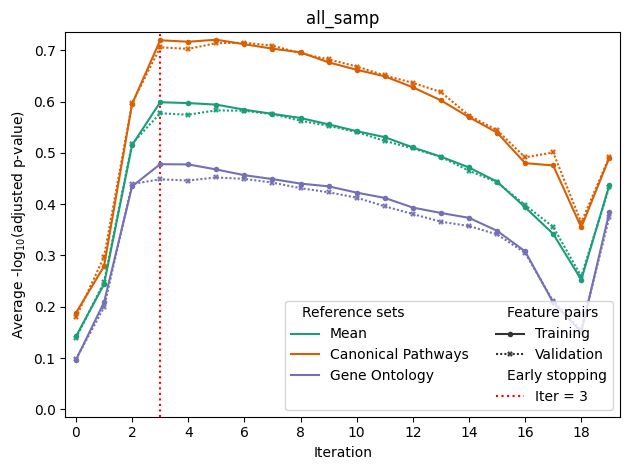

In [5]:
# We set n_PCs to 19 to reproduce plot from the paper
# Default value works fine as well
model.fit(df_data_train, n_PCs=19)

The `fit` method automatically splits the *feature pairs* into 50% training and 50% validation sets. Training set of feature pairs is used to select PCs on each iteration of the algorithm (maximum score), while validation set is used to determine the final number of PCs by the early stopping method. Specifically, the dashed red line is drawn at iteration after which there is little or no improvement in the validation set score.

The above optimization curve is automatically saved into `fit.all_samp.png`; `all_samp` refers to the fact that all training samples were used (see [Advanced example](advanced_run.ipynb) with several sample groups). The file `fit.tsv` contains the data from the plot in the table format, and `fit.log` contains the full optimization log.

The termination procedure might stop too early or too late. You can always manually refince the list of selected confounder PCs:

In [6]:
# Open the table representation of the above plot (PCs numbers are 0-based)
# 0th row corresponds to the raw data
fit_data = pd.read_csv(
    "out_data/GTEx_Whole_Blood/fit.tsv",
    sep="\t", index_col=0,
    dtype={"PC": "Int64"}
)
display(fit_data)
# Uncomment below to set the subset of confounder PCs manually
#model.confounder_PCs = [0, 1, 2, 17, 12]

,PC,all_samp;Canonical Pathways;training,all_samp;Canonical Pathways;validation,all_samp;Canonical Pathways;all,all_samp;Gene Ontology;training,all_samp;Gene Ontology;validation,all_samp;Gene Ontology;all,all_samp;mean;training,all_samp;mean;validation,all_samp;mean;all,mean;Canonical Pathways;training,mean;Canonical Pathways;validation,mean;Canonical Pathways;all,mean;Gene Ontology;training,mean;Gene Ontology;validation,mean;Gene Ontology;all,mean;mean;training,mean;mean;validation,mean;mean;all
Iteration,,,,,,,,,,,,,,,,,,,
0,<NA>,0.187871,0.179282,0.484495,0.096320,0.097821,0.295405,0.142095,0.138552,0.389950,0.187871,0.179282,0.484495,0.096320,0.097821,0.295405,0.142095,0.138552,0.389950
1,0,0.278803,0.297132,0.730810,0.208563,0.198734,0.562689,0.243683,0.247933,0.646749,0.278803,0.297132,0.730810,0.208563,0.198734,0.562689,0.243683,0.247933,0.646749
2,1,0.595418,0.596665,1.359490,0.434741,0.439244,1.037232,0.515079,0.517955,1.198361,0.595418,0.596665,1.359490,0.434741,0.439244,1.037232,0.515079,0.517955,1.198361
3,2,0.719489,0.705782,1.590421,0.477850,0.448376,1.090163,0.598670,0.577079,1.340292,0.719489,0.705782,1.590421,0.477850,0.448376,1.090163,0.598670,0.577079,1.340292
4,17,0.716559,0.702656,1.583160,0.477467,0.446032,1.086927,0.597013,0.574344,1.335043,0.716559,0.702656,1.583160,0.477467,0.446032,1.086927,0.597013,0.574344,1.335043
5,12,0.720507,0.713810,1.596511,0.467544,0.451943,1.079581,0.594025,0.582876,1.338046,0.720507,0.713810,1.596511,0.467544,0.451943,1.079581,0.594025,0.582876,1.338046
6,11,0.711714,0.714599,1.583469,0.456435,0.449269,1.065692,0.584075,0.581934,1.324581,0.711714,0.714599,1.583469,0.456435,0.449269,1.065692,0.584075,0.581934,1.324581
7,18,0.703086,0.708958,1.569668,0.448834,0.441979,1.047026,0.575960,0.575468,1.308347,0.703086,0.708958,1.569668,0.448834,0.441979,1.047026,0.575960,0.575468,1.308347
8,14,0.695889,0.694057,1.543607,0.440029,0.431120,1.024089,0.567959,0.562589,1.283848,0.695889,0.694057,1.543607,0.440029,0.431120,1.024089,0.567959,0.562589,1.283848


## Computing and visualizing enrichments

Once the `confounder_PCs` attribute is set, you can compute feature-wise tables of enrichments for each of the input reference feature collections. See the full list of accepted parameters in [API reference](../modules/corradjust.corradjust.rst#corradjust.corradjust.CorrAdjust.compute_feature_scores).

This and below methods work with an *arbitrary* data with the same features (columns) as the training set. All these methods use PCA, mean-centering, and winsorization parameters learned from the training data (i.e., the data on which you called `fit`).

In [7]:
feature_scores_train = model.compute_feature_scores(df_data_train)
feature_scores_test = model.compute_feature_scores(df_data_test)

# feature_scores is a dict, where the first key is "Raw" or "Clean"
# and the second key is reference collection name
display(feature_scores_test["Clean"]["Canonical Pathways"])

2024-11-15 16:36:21.851356 | Computing raw correlations for all_samp...
2024-11-15 16:36:22.669745 | Computing corrected correlations for all_samp...
2024-11-15 16:36:30.004857 | Computing raw correlations for all_samp...
2024-11-15 16:36:30.820176 | Computing corrected correlations for all_samp...


,feature_name,shared_pairs@K,shared_pairs@total,enrichment,balanced_precision,pvalue,padj
feature_id,,,,,,,
ENSG00000114942.13,EEF1B2,117/332,280/7213,8.958467,0.929586,6.666928e-87,4.809522e-83
ENSG00000266472.5,MRPS21,114/377,267/7213,8.075151,0.917299,9.381586e-79,3.383938e-75
ENSG00000090263.15,MRPS33,121/478,267/7213,6.778080,0.897049,2.561231e-74,6.158907e-71
ENSG00000104408.9,EIF3E,84/177,306/7213,10.906809,0.951072,2.633657e-69,4.749801e-66
ENSG00000254772.9,EEF1G,91/130,599/7213,8.154059,0.958608,1.657549e-67,2.391511e-64
...,...,...,...,...,...,...,...
ENSG00000278828.1,HIST1H3H,0/0,0/0,NaN,NaN,NaN,NaN
ENSG00000280071.3,CH507-9B2.3,0/0,0/0,NaN,NaN,NaN,NaN
ENSG00000281106.2,LINC00282,0/0,0/0,NaN,NaN,NaN,NaN


Columns of the above table have the following meaning:

- `shared_pairs@K`: the second number stands for feature pairs involving the corresponding feature among the most highly correlated pairs ($K_j$ in the paper's notation). The first number is how many of these pairs ared shared ($k_j$ in the paper's notation).
- `shared_pairs@total`: the second number stands for feature pairs involving the corresponding feature among all pairs ($N_j$ in the paper's notation). The first number is how many of these pairs are shared ($n_j$ in the paper's notation).
- `enrichment`: essentially, this is the ratio of `shared_pairs@K` and `shared_pairs@total` ratios. However, the value is slightly different from a simple ratio since we use Bayesian regularization to shrink enrichment towards 1.0 to avoid problems with zero counts.
- `balanced_precision`: non-linearly scaled version of `enrichment`. Enrichment = 1 corresponds to balanced precision of 0.5 (baseline), while maximum possible value of enrichment corresponds to balanced precision of 1.
- `pvalue`: hypergeometric test p-value (as with `enrichment`, Bayesian regularization shrinks p-value towards 1.0 to avoid problems with zero counts).
- `padj`: p-value adjusted for multiple testing by the Benjamini-Hochberg procedure.

Features with `total` less then `min_pairs_to_score` parameter of `CorrAdjust` (default is `1000`) are ignored during the enrichment/p-value computations.

A convenient way to visualize this table is volcano plot. Size of each point on the plot is the second number in `shared_pairs@K` column. See the full list of accepted parameters in [API reference](../modules/corradjust.corradjust.rst#corradjust.corradjust.CorrAdjust.make_volcano_plot).

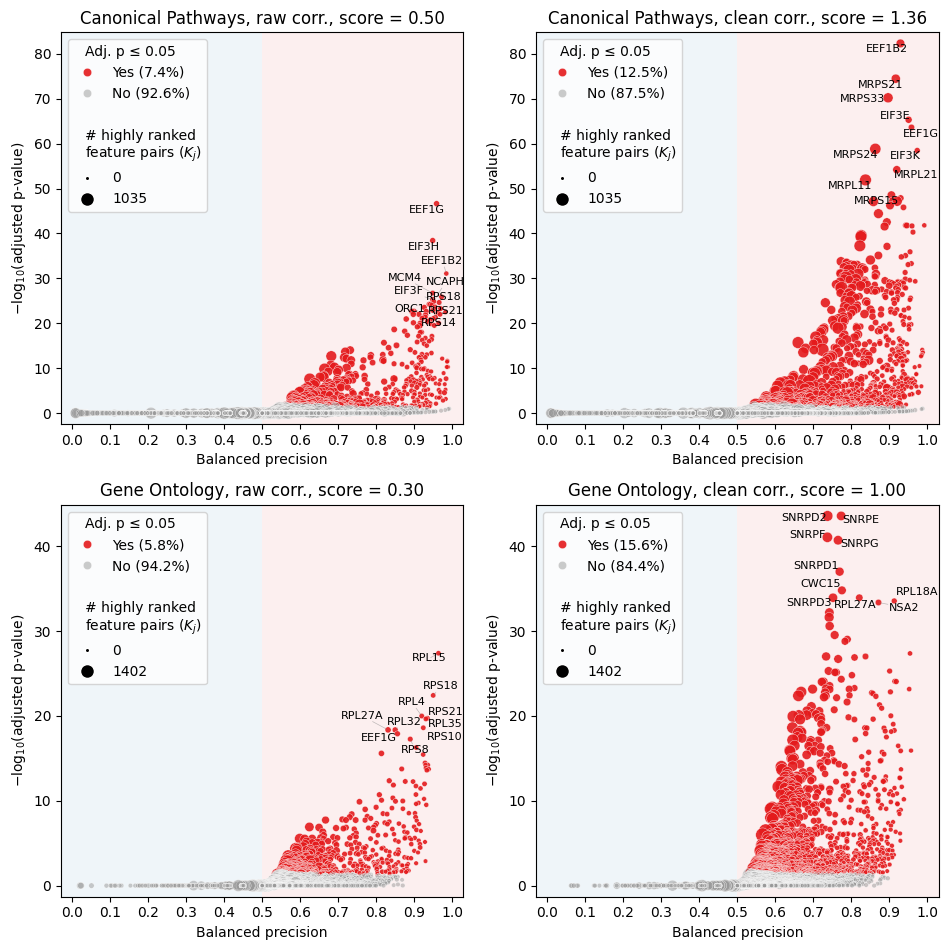

In [8]:
model.make_volcano_plot(
    feature_scores_test,
    "volcano.test_samples.png",
    # Number of features to annotate (default is None)
    annotate_features=10
)

## Visualizing distribution of correlations

While the above plot shows feature-centric view on correction results, we can also look at the impact of CorrAdjust on the distribution of all feature-feature correlations. See the full list of accepted parameters in [API reference](../modules/corradjust.corradjust.rst#corradjust.corradjust.CorrAdjust.make_corr_distr_plot).

2024-11-15 16:36:46.273814 | Computing raw correlations for all_samp...
2024-11-15 16:36:47.094092 | Computing corrected correlations for all_samp...


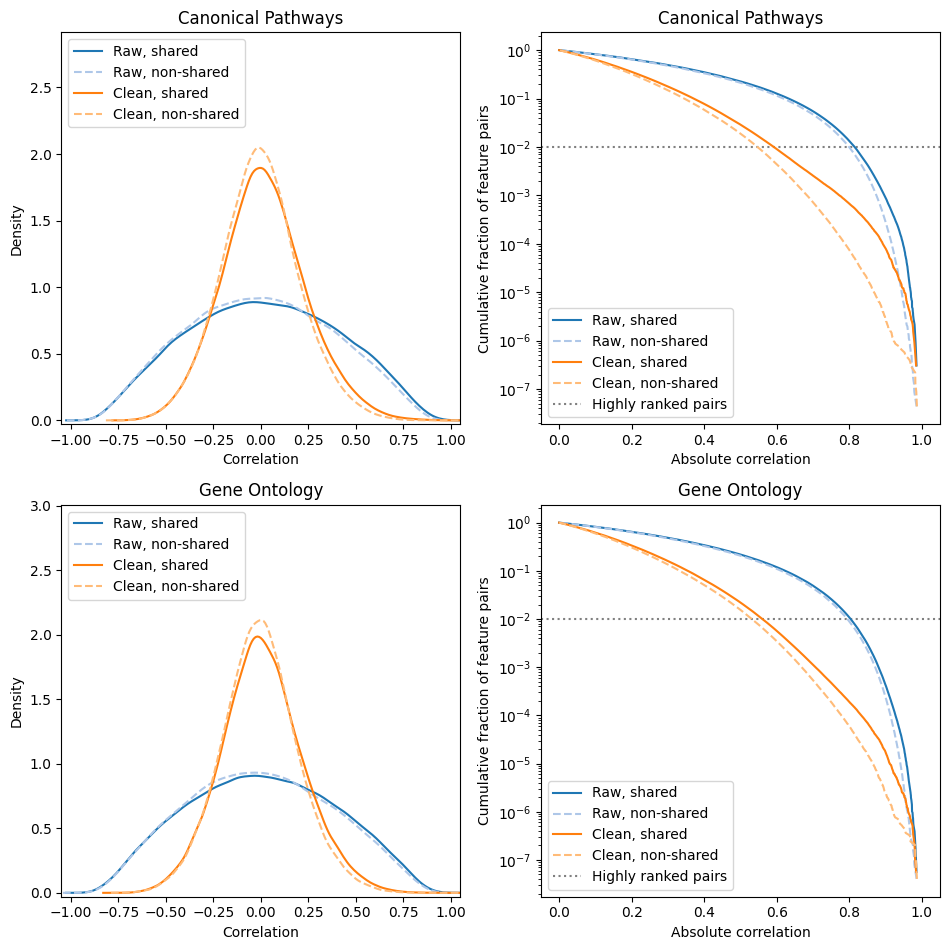

In [9]:
model.make_corr_distr_plot(df_data_test, "corr_distr.test_samples.png")

The left panels show histogram of correlations before and after correction – often, CorrAdjust shrinks the correlations towards 0.

The right panels show a more granular view on the distribution tail (specific tail is shown according to the `sign` parameter of the config). Dotted gray line stands for the `high_corr_frac` value. Before the correction, the threshold corresponding to 1% of the highest absolute correlations was 0.8, while after cleaning it became 0.55.

The above plots also distinguish between shared pairs (gene pairs with at least one shared pathway) and non-shared pairs. Correlations among shared pairs are, on average, higher then among non-shared ones, and this effect becomes stronger after the correction.

## Obtaining corrected data

You can use `transform` method to residualize the identified confounder PCs from any data.

In [10]:
# df_data_test_clean contains clean data (residuals)
# df_rsquared contains feature-wise R^2 scores for PC regression models
df_data_test_clean, df_rsquareds = model.transform(df_data_test)
display(df_data_test_clean)

,ENSG00000188976.10,ENSG00000187961.13,ENSG00000188290.10,ENSG00000187608.8,ENSG00000131591.17,ENSG00000186891.13,ENSG00000186827.10,ENSG00000078808.16,ENSG00000176022.4,ENSG00000160087.20,...,ENSG00000198712.1,ENSG00000228253.1,ENSG00000198899.2,ENSG00000198938.2,ENSG00000198840.2,ENSG00000212907.2,ENSG00000198886.2,ENSG00000198786.2,ENSG00000198695.2,ENSG00000198727.2
GTEX-1122O-0005-SM-5O99J,0.050231,-0.369322,2.239115,0.678527,0.026114,-0.571762,0.601355,0.148707,-0.002400,-0.026402,...,0.130188,0.172971,0.062483,0.184332,-0.189881,0.314373,0.192234,0.562027,0.274883,0.408772
GTEX-113IC-0006-SM-5NQ9C,-0.304865,-0.147708,2.680885,2.763680,0.272341,-0.803344,0.144900,-0.513377,-0.401348,-0.041847,...,-0.423008,-0.878231,-0.610733,-0.400349,-0.411132,-0.868399,-0.618605,-1.073067,-0.863422,-0.680554
GTEX-117XS-0005-SM-5PNU6,-0.037980,-0.642927,-1.242912,-0.240673,-0.277833,-0.398900,-0.717077,0.209971,0.076258,0.096425,...,0.109895,0.374746,0.154929,0.141935,0.145463,0.469610,0.128637,0.370306,0.612194,0.231607
GTEX-1192W-0005-SM-5NQBQ,0.125747,-0.006353,1.015262,0.450212,0.198476,0.383210,-0.177790,-0.064182,0.235887,-0.382492,...,0.441488,0.599074,0.401713,0.523564,0.317172,0.457247,0.484326,0.661974,0.730998,0.022344
GTEX-11DXW-0006-SM-5NQ7Y,0.076788,-0.138612,0.168263,-0.610861,-0.025928,-0.313764,0.198317,-0.157295,-0.295122,-0.245366,...,-0.005570,0.391351,0.283745,-0.048960,0.246081,0.109192,0.219166,-0.053995,-0.136555,0.340095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZVE2-0006-SM-51MRW,-0.039524,1.113171,0.700570,-0.147131,0.108795,1.572345,2.492765,0.047323,0.178910,0.034573,...,-0.508031,-0.512369,-0.466586,-0.422382,-0.484379,-0.998519,-0.806124,-1.024816,-1.005599,-0.554363
GTEX-ZVT2-0005-SM-57WBW,0.092948,-0.089754,0.161043,-0.131826,0.113745,0.399181,-0.245921,0.174028,0.380953,-0.148566,...,0.140526,0.523956,0.367210,0.122278,0.114591,0.268310,0.224413,0.169460,0.170323,0.477202
GTEX-ZVT4-0006-SM-57WB8,-0.173546,0.118193,-0.243303,0.724267,0.144558,0.941209,1.597995,-0.109322,-0.385729,-0.038125,...,0.932081,1.095124,1.196443,0.656256,0.543247,0.555277,0.943353,0.787113,0.565947,0.784144
GTEX-ZVZP-0006-SM-51MSW,0.097312,0.029589,-0.303182,-0.378001,0.461521,1.080009,0.108689,0.251166,0.018420,0.072854,...,0.780985,0.767920,0.952384,1.110271,0.386526,0.365610,0.964042,0.715266,0.994353,1.261183


## Exporting correlations to file

The `export_corrs` method generates a tab-separated table with all feature pairs and their clean and raw correlations, p-values, and reference sets information. The table is always sorted from the lowest to the highest correlation. The table can be *huge* if you have many feature, so we write it directly to disk in chunks instead of making a Pandas data frame.

In [11]:
model.export_corrs(df_data_test, "corrs.test_samples.tsv")

# These lines just show a representative chunk of the file
corrs = pd.read_csv(
    "out_data/GTEx_Whole_Blood/corrs.test_samples.tsv",
    sep="\t", nrows=100000
)
corrs.loc[corrs["Gene Ontology_flag"] != -1].head(10)

2024-11-15 16:37:03.630026 | Computing raw correlations for all_samp...
2024-11-15 16:37:04.455062 | Computing corrected correlations for all_samp...
2024-11-15 16:37:06.287304 | Starting export to file...
100%|█████████████████████████████████████████████████████████████████████████████████| 51/51 [01:49<00:00,  2.15s/it]


,feature_id1,feature_id2,feature_name1,feature_name2,feature_type1,feature_type2,corr_clean,pvalue_clean,corr_raw,pvalue_raw,Canonical Pathways_flag,Canonical Pathways_trainval,Gene Ontology_flag,Gene Ontology_trainval
0,ENSG00000134001.12,ENSG00000109118.13,EIF2S1,PHF12,mRNA,mRNA,-0.797694,1.020175e-83,-0.766172,5.202540e-74,-1,-1,0,0
2,ENSG00000173120.14,ENSG00000100387.8,KDM2A,RBX1,mRNA,mRNA,-0.790738,2.692452e-81,-0.480879,3.266728e-23,0,0,1,0
3,ENSG00000143742.12,ENSG00000173120.14,SRP9,KDM2A,mRNA,mRNA,-0.785374,1.718902e-79,-0.135602,8.379958e-03,0,0,0,0
4,ENSG00000265354.3,ENSG00000109118.13,TIMM23,PHF12,mRNA,mRNA,-0.784154,4.350409e-79,-0.666457,9.263482e-50,-1,-1,0,1
5,ENSG00000014641.17,ENSG00000074755.14,MDH1,ZZEF1,mRNA,mRNA,-0.783222,8.809436e-79,-0.753369,2.963888e-70,-1,-1,0,0
6,ENSG00000014641.17,ENSG00000109118.13,MDH1,PHF12,mRNA,mRNA,-0.780033,9.586080e-78,-0.776452,3.326642e-77,-1,-1,0,0
7,ENSG00000079785.14,ENSG00000109118.13,DDX1,PHF12,mRNA,mRNA,-0.778276,3.510557e-77,-0.630010,4.314516e-43,-1,-1,1,1
8,ENSG00000109118.13,ENSG00000181610.12,PHF12,MRPS23,mRNA,mRNA,-0.777906,4.607714e-77,-0.525653,3.605526e-28,-1,-1,0,1
9,ENSG00000014641.17,ENSG00000177463.15,MDH1,NR2C2,mRNA,mRNA,-0.777216,7.641771e-77,-0.614369,1.706607e-40,0,1,0,1
10,ENSG00000177463.15,ENSG00000138663.8,NR2C2,COPS4,mRNA,mRNA,-0.777164,7.935098e-77,-0.387611,5.791675e-15,0,1,0,1


After the columns with correlation p-values, the table has a block of columns describing reference sets. Each reference collection is represented by exactly 2 columns:

1. **flag**:
    - **== 1**: the feature pair is shared.
    - **== 0**: the feature pair is non-shared, though both features are present in *some* sets of the collection.
    - **== -1**: one of the features of the pair is absent from *all* sets of the collection.
2. **trainval**:
    - If **flag != -1**, this column shows whether feature pair is in training (0) or in validation (1) subset.
    - If **flag == -1**, this column is also -1.